Actividad: Problemas de clasificación

Ejercicio 1 (50 puntos)

En este ejercicio trabajarás con el conjunto de datos que se te asignó de acuerdo al último número de tu matrícula (ver las notas del ejercicio). En estos archivos se tienen datos procesados de un experimento de psicología en el que se mide la respuesta cerebral cuando un sujeto presta atención a un estímulo visual que aparece de manera repentina y cuando no presta atención a dicho estímulo visual. Los datos están en archivos de texto, los cuales se cargan con la función loadtxt de numpyLinks to an external site.. La primera columna corresponde a la clase (1 o 2). La clase 1 representa cuando el sujeto está prestando atención, y la clase 2 cuando no lo hace. La segunda columna se ignora, mientras que el resto de las columnas indican las variables que se calcularon de la respuesta cerebral medida con la técnicas de Electroencefaolografía para cada caso.

Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Archivo de texto

In [3]:
import numpy as np

# Cargar los datos desde el archivo
data = np.loadtxt('P1_1.txt')

# Contar las muestras por clase
clases, conteos = np.unique(data[:, 0], return_counts=True)
print(f'Clases: {clases}')
print(f'Conteos: {conteos}')


Clases: [1. 2.]
Conteos: [ 278 1115]


1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

Debido a que pudimos observar que tenemos muestras desbalanceadas si se tiene que usar una estrategía para mitigar el problema.

En mi caso utilizaré un sobremuestreo para aumentar las muestra de mi clase con menos valores.

2. Evalúa al menos 8 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [8]:
import numpy as np
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Cargar los datos
data = np.loadtxt("P1_1.txt")
x = data[:, 2:]  # Ignoramos la segunda columna
y = data[:, 0]   # Primera columna es la clase

# Definir los modelos
models = {
    'Linear SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'K-Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(),
    'LDA': LinearDiscriminantAnalysis()
}

# Evaluar los modelos con validación cruzada y upsampling
kf = StratifiedKFold(n_splits=5, shuffle=True)

for model_name, model in models.items():
    print(f'----- {model_name} -----')
    
    cv_y_test = []
    cv_y_pred = []
    
    for train_index, test_index in kf.split(x, y):
        # Fase de entrenamiento
        x_train = x[train_index, :]
        y_train = y[train_index]

        # Sobremuestreo (Upsampling)
        x1 = x_train[y_train == 1, :]
        y1 = y_train[y_train == 1]
        n1 = len(y1)

        x2 = x_train[y_train == 2, :]
        y2 = y_train[y_train == 2]
        n2 = len(y2)

        ind = random.choices([i for i in range(n1)], k=n2)

        x_sub = np.concatenate((x1[ind, :], x2), axis=0)
        y_sub = np.concatenate((y1[ind], y2), axis=0)

        model.fit(x_sub, y_sub)

        # Fase de prueba
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = model.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    # Imprimir informe de clasificación
    print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Linear SVM -----
              precision    recall  f1-score   support

         1.0       0.69      0.81      0.74       278
         2.0       0.95      0.91      0.93      1115

    accuracy                           0.89      1393
   macro avg       0.82      0.86      0.84      1393
weighted avg       0.90      0.89      0.89      1393

----- Decision Tree -----
              precision    recall  f1-score   support

         1.0       0.54      0.54      0.54       278
         2.0       0.88      0.89      0.88      1115

    accuracy                           0.82      1393
   macro avg       0.71      0.71      0.71      1393
weighted avg       0.82      0.82      0.82      1393

----- Random Forest -----
              precision    recall  f1-score   support

         1.0       0.88      0.56      0.68       278
         2.0       0.90      0.98      0.94      1115

    accuracy                           0.90      1393
   macro avg       0.89      0.77      0.81      1393

3. Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos.

In [4]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from scipy.special import expit  # Para la función sigmoide
import random

# Implementación de la regresión logística desde cero
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradiente descendente
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = expit(linear_model)  # Sigmoide

            # Gradiente de los pesos y el sesgo
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Actualización de los parámetros
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = expit(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 2 for i in y_predicted]
        return np.array(y_predicted_cls)

# Separar las características y etiquetas del conjunto de datos
data = np.loadtxt("P1_1.txt")
X = data[:, 2:]  # Omitir la segunda columna
y = data[:, 0]   # Primera columna es la clase

# Configuración de la validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar la regresión logística desde cero con upsampling
print('----- Logistic Regression from Scratch with Upsampling -----')
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Sobremuestreo (Upsampling) en la fase de entrenamiento
    X1 = X_train[y_train == 1, :]
    y1 = y_train[y_train == 1]
    n1 = len(y1)

    X2 = X_train[y_train == 2, :]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    # Crear más muestras de la clase minoritaria para balancear
    ind = random.choices(range(n1), k=n2)
    X_upsampled = np.concatenate((X1[ind, :], X2), axis=0)
    y_upsampled = np.concatenate((y1[ind], y2), axis=0)

    # Entrenar el modelo con los datos balanceados
    clf = LogisticRegressionScratch(lr=0.01, n_iters=1000)
    clf.fit(X_upsampled, y_upsampled)

    # Predicción en la fase de prueba
    y_pred = clf.predict(X_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

# Reporte final
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Logistic Regression from Scratch with Upsampling -----
              precision    recall  f1-score   support

         1.0       0.19      0.90      0.31       278
         2.0       0.64      0.04      0.08      1115

    accuracy                           0.21      1393
   macro avg       0.41      0.47      0.20      1393
weighted avg       0.55      0.21      0.13      1393



4. Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.

----- Selección óptima del número de características -----
---- n características = 1
Exactitud: 0.7394058946391274
---- n características = 2
Exactitud: 0.7422758567339677
---- n características = 3
Exactitud: 0.7889327247879117
---- n características = 4
Exactitud: 0.7903561022150022
---- n características = 5
Exactitud: 0.8162244398029962
---- n características = 6
Exactitud: 0.826260282096903
---- n características = 7
Exactitud: 0.829122508444857
---- n características = 8
Exactitud: 0.8449317964982852
---- n características = 9
Exactitud: 0.8391764008148319
---- n características = 10
Exactitud: 0.8499522962275341
---- n características = 11
Exactitud: 0.8563987519661691
---- n características = 12
Exactitud: 0.8635775250767128
---- n características = 13
Exactitud: 0.8585647610943503
---- n características = 14
Exactitud: 0.8685954462236664
---- n características = 15
Exactitud: 0.8635826822413037
---- n características = 16
Exactitud: 0.8657383770403033
---- n características =

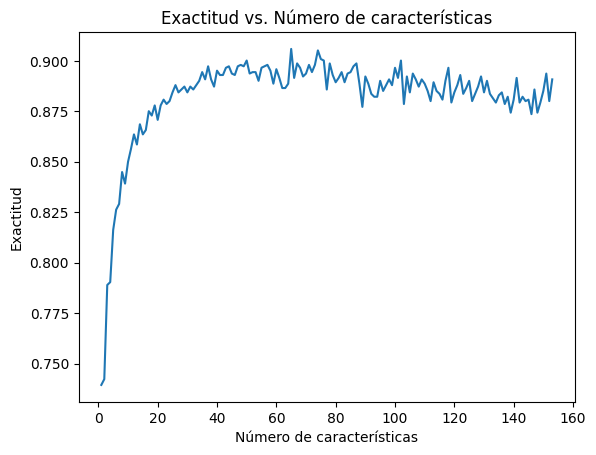

Características seleccionadas:  [  0   2   3  11  12  13  14  15  16  17  18  19  20  21  22  23  25  26
  27  28  29  30  31  32  39  40  55  56  60  61  62  63  64  65  66  67
  76  77  78  79  80  81  82  83  84  87  88  89  90  91  92 112 113 116
 117 121 123 124 125 126 127 140 141 148 149]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
import random

# Separar las características y etiquetas del conjunto de datos
data = np.loadtxt("P1_1.txt")
X = data[:, 2:]  # Omitir la primera y segunda columna
y = data[:, 0]   # La clase es la primera columna

#------------------------------------------------------------------------------------------------------------------
# Selección óptima del número de características utilizando validación cruzada con sobremuestreo
#------------------------------------------------------------------------------------------------------------------

print("----- Selección óptima del número de características -----")

n_features = X.shape[1]  # Número de características
n_feats = list(range(1, n_features + 1))  # Probar todas las posibles cantidades de características

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_nfeat = []

for n_feat in n_feats:
    print('---- n características =', n_feat)

    acc_cv = []

    for train_index, test_index in kf.split(X, y):

        # Fase de entrenamiento
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Sobremuestreo (Upsampling) para balancear las clases en el conjunto de entrenamiento
        X1 = X_train[y_train == 1, :]
        y1 = y_train[y_train == 1]
        n1 = len(y1)

        X2 = X_train[y_train == 2, :]
        y2 = y_train[y_train == 2]
        n2 = len(y2)

        ind = random.choices(range(n1), k=n2)
        X_upsampled = np.concatenate((X1[ind, :], X2), axis=0)
        y_upsampled = np.concatenate((y1[ind], y2), axis=0)

        # Selección de características con el número actual de características
        fselection_cv = SelectKBest(f_classif, k=n_feat)
        fselection_cv.fit(X_upsampled, y_upsampled)
        X_train_transformed = fselection_cv.transform(X_upsampled)

        # Entrenar el clasificador
        clf_cv = SVC(kernel='linear')
        clf_cv.fit(X_train_transformed, y_upsampled)

        # Transformar el conjunto de prueba utilizando las mismas características seleccionadas
        X_test_transformed = fselection_cv.transform(X_test)
        y_pred = clf_cv.predict(X_test_transformed)

        # Calcular la exactitud en esta iteración de la validación cruzada
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    # Promediar la exactitud obtenida con el número actual de características
    acc = np.mean(acc_cv)
    acc_nfeat.append(acc)

    print('Exactitud:', acc)

# Encontrar el número óptimo de características
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de características: ", opt_features)

# Graficar el rendimiento en función del número de características
plt.plot(n_feats, acc_nfeat)
plt.xlabel("Número de características")
plt.ylabel("Exactitud")
plt.title("Exactitud vs. Número de características")
plt.show()

# Selección de características con el número óptimo de características
fselection = SelectKBest(f_classif, k=opt_features)
fselection.fit(X_upsampled, y_upsampled)
X_transformed = fselection.transform(X_upsampled)

# Ajustar el modelo con las características seleccionadas y los datos sobremuestreados
clf = SVC(kernel='linear')
clf.fit(X_transformed, y_upsampled)

print("Características seleccionadas: ", fselection.get_support(indices=True))


5. Repite el paso anterior, pero para un método de selección de características secuencial.

Este inciso no se logró completar debido a exceso de tiempo en la run

![Captura de pantalla 2024-09-02 144256.png](<attachment:Captura de pantalla 2024-09-02 144256.png>)

![Captura de pantalla 2024-09-02 144313.png](<attachment:Captura de pantalla 2024-09-02 144313.png>)
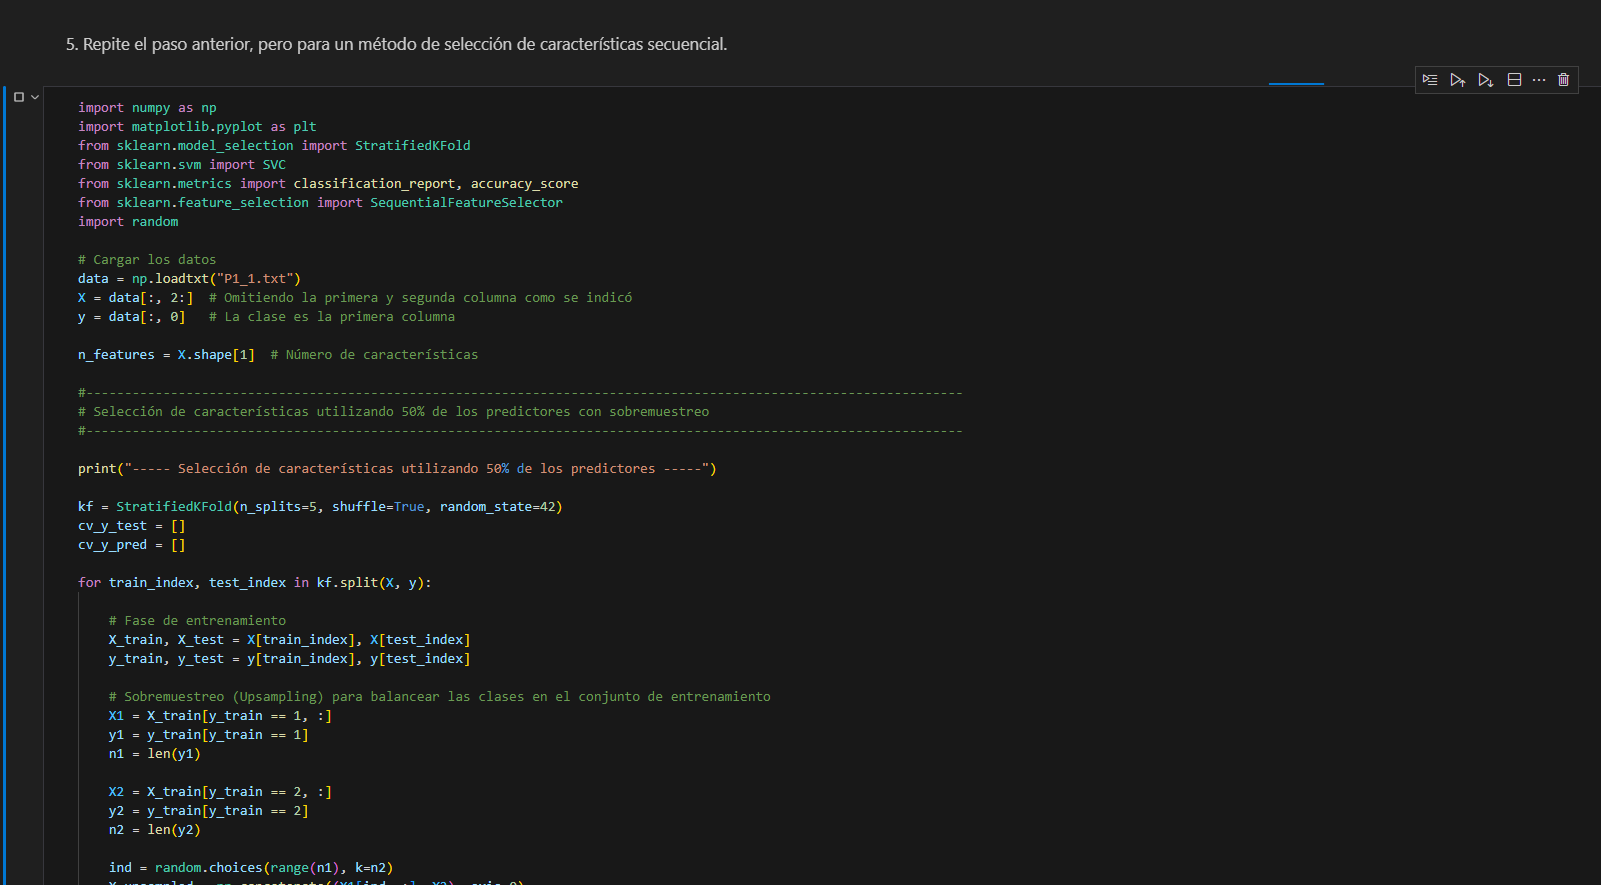
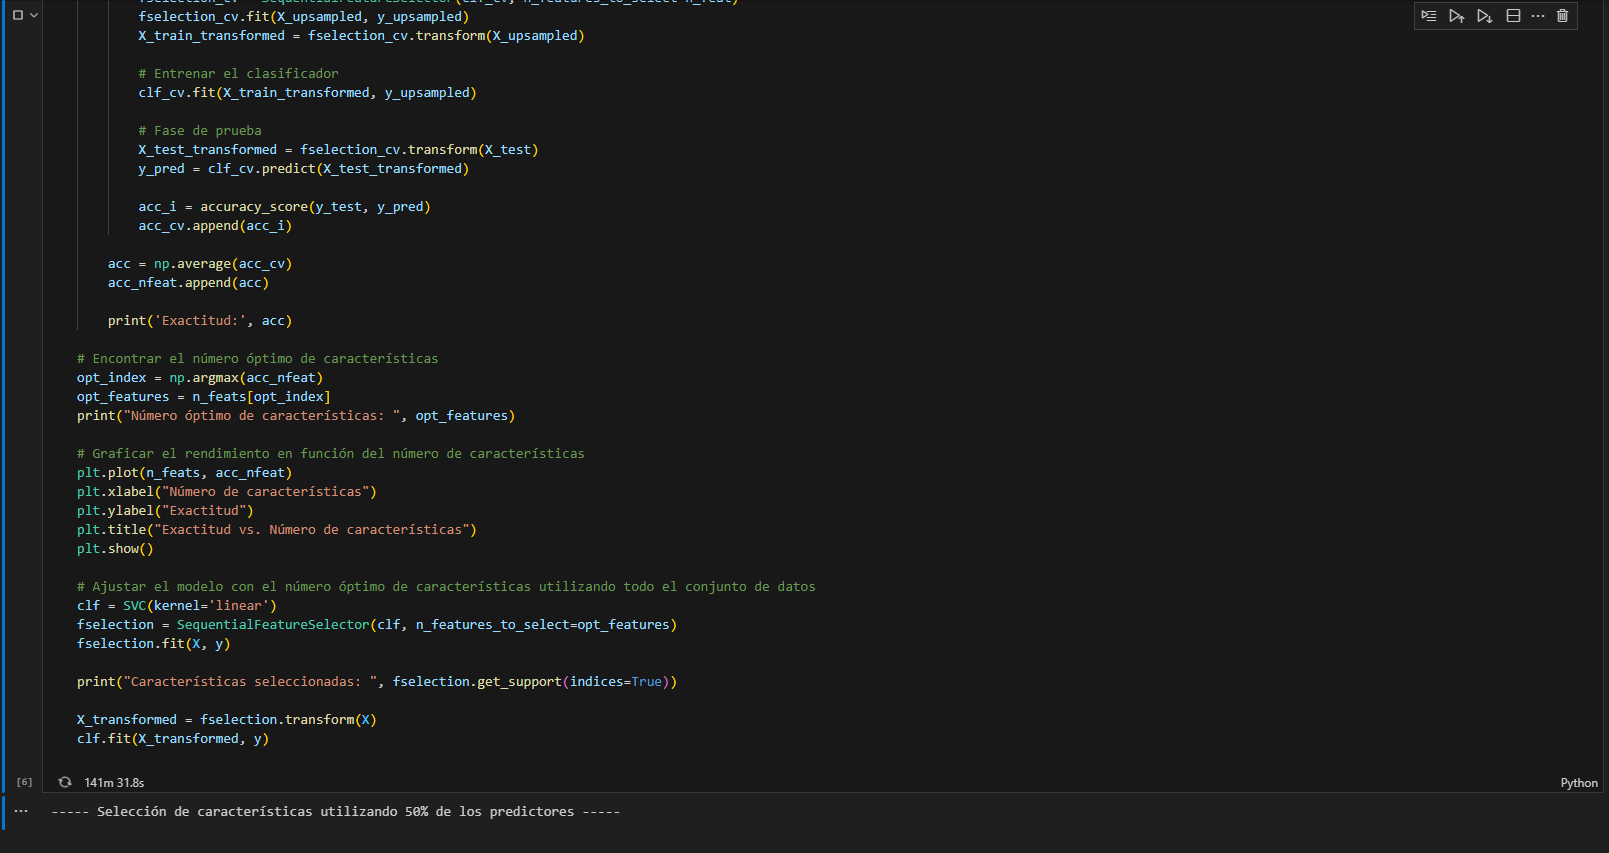

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
import random

# Cargar los datos
data = np.loadtxt("P1_1.txt")
X = data[:, 2:]  # Omitiendo la primera y segunda columna
y = data[:, 0]   # La clase es la primera columna

n_features = X.shape[1]  # Número de características

#------------------------------------------------------------------------------------------------------------------
# Selección óptima del número de características utilizando validación cruzada con sobremuestreo
#------------------------------------------------------------------------------------------------------------------

print("----- Selección óptima del número de características -----")

n_feats = list(range(1, n_features + 1))  # Probar todas las posibles cantidades de características
acc_nfeat = []

for n_feat in n_feats:
    print('---- n características =', n_feat)

    acc_cv = []

    for train_index, test_index in kf.split(X, y):

        # Fase de entrenamiento
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Sobremuestreo (Upsampling) para balancear las clases en el conjunto de entrenamiento
        X1 = X_train[y_train == 1, :]
        y1 = y_train[y_train == 1]
        n1 = len(y1)

        X2 = X_train[y_train == 2, :]
        y2 = y_train[y_train == 2]
        n2 = len(y2)

        ind = random.choices(range(n1), k=n2)
        X_upsampled = np.concatenate((X1[ind, :], X2), axis=0)
        y_upsampled = np.concatenate((y1[ind], y2), axis=0)

        # Selección de características secuencial
        clf_cv = SVC(kernel='linear')
        fselection_cv = SequentialFeatureSelector(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(X_upsampled, y_upsampled)
        X_train_transformed = fselection_cv.transform(X_upsampled)

        # Entrenar el clasificador
        clf_cv.fit(X_train_transformed, y_upsampled)

        # Fase de prueba
        X_test_transformed = fselection_cv.transform(X_test)
        y_pred = clf_cv.predict(X_test_transformed)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('Exactitud:', acc)

# Encontrar el número óptimo de características
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de características: ", opt_features)

# Graficar el rendimiento en función del número de características
plt.plot(n_feats, acc_nfeat)
plt.xlabel("Número de características")
plt.ylabel("Exactitud")
plt.title("Exactitud vs. Número de características")
plt.show()

# Ajustar el modelo con el número óptimo de características utilizando todo el conjunto de datos
clf = SVC(kernel='linear')
fselection = SequentialFeatureSelector(clf, n_features_to_select=opt_features)
fselection.fit(X_upsampled, y_upsampled)

print("Características seleccionadas: ", fselection.get_support(indices=True))

X_transformed = fselection.transform(X)
clf.fit(X_transformed, y)


----- Selección de características utilizando 50% de los predictores -----


KeyboardInterrupt: 

6. Repite el paso 4, pero para un método de selección de características recursivo.

----- Selección de características utilizando 50% de los predictores -----
Características seleccionadas:  [  0   1   5   9  10  12  13  14  16  17  18  19  20  21  24  26  27  29
  30  31  33  38  39  40  45  46  52  54  60  62  63  64  65  66  70  71
  73  74  75  76  77  79  80  81  83  85  86  87  89  90  91  93  94  95
  96  97  99 108 109 110 111 112 117 118 119 120 121 123 124 126 129 130
 133 135 143 149]
              precision    recall  f1-score   support

         1.0       0.69      0.84      0.76       278
         2.0       0.96      0.90      0.93      1115

    accuracy                           0.89      1393
   macro avg       0.82      0.87      0.84      1393
weighted avg       0.90      0.89      0.90      1393

----- Selección óptima del número de características -----
---- n características = 1
Exactitud: 0.7243701812743354
---- n características = 2
Exactitud: 0.7616564812665997
---- n características = 3
Exactitud: 0.8169232356050644
---- n características = 4

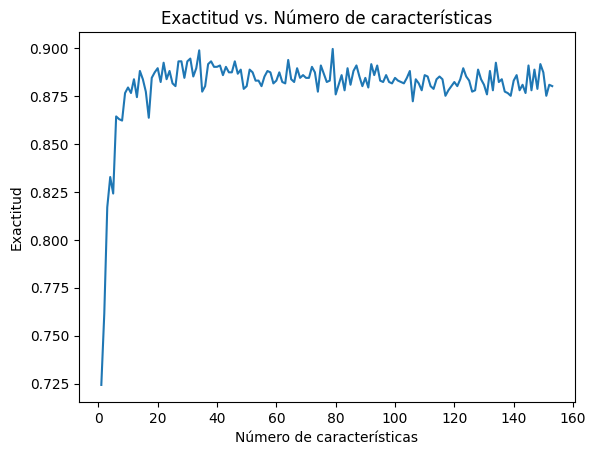

Características seleccionadas:  [  0   1   5   9  10  12  13  14  16  17  18  19  20  21  24  26  27  29
  30  31  32  33  38  39  40  45  46  52  54  60  62  63  64  65  66  70
  71  73  74  75  76  77  79  80  81  83  84  85  86  87  89  90  91  92
  93  94  95  96  97  99 108 109 110 111 112 117 118 119 120 121 123 124
 126 129 130 133 135 143 149]


SVC(kernel='linear')

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import RFE

# Separar las características y etiquetas del conjunto de datos balanceado
X = data[:, 2:]  # Omitiendo la primera y segunda columna como se indicó
y = data[:, 0]  # La clase es la primera columna

n_features = X.shape[1]  # Número de características

#------------------------------------------------------------------------------------------------------------------
# Reduce el número de características a la mitad utilizando RFE
#------------------------------------------------------------------------------------------------------------------

print("----- Selección de características utilizando 50% de los predictores -----")

# Selección de características recursiva (RFE)
clf = SVC(kernel='linear')
fselection = RFE(clf, n_features_to_select=n_features // 2)
fselection.fit(X, y)

print("Características seleccionadas: ", fselection.get_support(indices=True))

# Ajustar el modelo utilizando el nuevo conjunto de datos
X_transformed = fselection.transform(X)
clf.fit(X_transformed, y)

# Evaluar el modelo utilizando validación cruzada
cv_y_test = []
cv_y_pred = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X, y):

    # Fase de entrenamiento
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Sobremuestreo (Upsampling) para balancear las clases en el conjunto de entrenamiento
    X1 = X_train[y_train == 1, :]
    y1 = y_train[y_train == 1]
    n1 = len(y1)

    X2 = X_train[y_train == 2, :]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    ind = random.choices(range(n1), k=n2)
    X_upsampled = np.concatenate((X1[ind, :], X2), axis=0)
    y_upsampled = np.concatenate((y1[ind], y2), axis=0)

    # Selección de características recursiva (RFE)
    clf_cv = SVC(kernel='linear')
    fselection_cv = RFE(clf_cv, n_features_to_select=n_features // 2)
    fselection_cv.fit(X_upsampled, y_upsampled)
    X_train_transformed = fselection_cv.transform(X_upsampled)

    # Entrenar el clasificador
    clf_cv.fit(X_train_transformed, y_upsampled)

    # Fase de prueba
    X_test_transformed = fselection_cv.transform(X_test)
    y_pred = clf_cv.predict(X_test_transformed)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

#------------------------------------------------------------------------------------------------------------------
# Encontrar el número óptimo de características utilizando validación cruzada
#------------------------------------------------------------------------------------------------------------------

print("----- Selección óptima del número de características -----")

n_feats = list(range(1, n_features + 1))  # Probar todas las posibles cantidades de características

acc_nfeat = []

for n_feat in n_feats:
    print('---- n características =', n_feat)

    acc_cv = []

    for train_index, test_index in kf.split(X, y):

        # Fase de entrenamiento
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Sobremuestreo (Upsampling) para balancear las clases en el conjunto de entrenamiento
        X1 = X_train[y_train == 1, :]
        y1 = y_train[y_train == 1]
        n1 = len(y1)

        X2 = X_train[y_train == 2, :]
        y2 = y_train[y_train == 2]
        n2 = len(y2)

        ind = random.choices(range(n1), k=n2)
        X_upsampled = np.concatenate((X1[ind, :], X2), axis=0)
        y_upsampled = np.concatenate((y1[ind], y2), axis=0)

        # Selección de características recursiva (RFE)
        clf_cv = SVC(kernel='linear')
        fselection_cv = RFE(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(X_upsampled, y_upsampled)
        X_train_transformed = fselection_cv.transform(X_upsampled)

        # Entrenar el clasificador
        clf_cv.fit(X_train_transformed, y_upsampled)

        # Fase de prueba
        X_test_transformed = fselection_cv.transform(X_test)
        y_pred = clf_cv.predict(X_test_transformed)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('Exactitud:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de características: ", opt_features)

# Graficar el rendimiento en función del número de características
plt.plot(n_feats, acc_nfeat)
plt.xlabel("Número de características")
plt.ylabel("Exactitud")
plt.title("Exactitud vs. Número de características")
plt.show()

# Ajustar el modelo con el número óptimo de características
clf = SVC(kernel='linear')
fselection = RFE(clf, n_features_to_select=opt_features)
fselection.fit(X, y)

print("Características seleccionadas: ", fselection.get_support(indices=True))

X_transformed = fselection.transform(X)
clf.fit(X_transformed, y)


7. Escoge alguna de las técnicas de selección de características que probaste con anteioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:

    A. Aplica el método de selección de características con todos los datos.
    
    B. Ajusta el modelo con las características encontradas.

In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
import joblib  # Para guardar el modelo

# Este valor es el número óptimo de características que obtuviste
opt_features = 65

# Separar las características y etiquetas del conjunto de datos original 
X = data[:, 2:]  # Omitiendo la primera y segunda columna
y = data[:, 0]   # La clase es la primera columna

# Preparar el modelo final para producción
# Aplicar la selección de características en todo el conjunto de datos
fselection_final = SelectKBest(f_classif, k=opt_features)
fselection_final.fit(X, y)

# Imprimir las características seleccionadas
selected_features = fselection_final.get_support(indices=True)
print("Características seleccionadas:", selected_features)

# Transformar todo el conjunto de datos con las características seleccionadas
X_transformed_final = fselection_final.transform(X)

# Ajustar el modelo final con el conjunto de datos completo
clf_final = SVC(kernel='linear')
clf_final.fit(X_transformed_final, y)

# Obtener e imprimir información del modelo final
print('\n Datos del modelo final ajustado con las características óptimas')
print("\n Intercept:", clf_final.intercept_)
print("Coeficientes:", clf_final.coef_)

# Guardar el modelo entrenado para producción
joblib.dump(clf_final, 'modelo_produccion.pkl')
joblib.dump(fselection_final, 'selector_caracteristicas.pkl')

print("Modelo entrenado y guardado para producción.")


Características seleccionadas: [  2   3  11  12  13  14  15  16  17  18  19  20  21  22  23  25  26  27
  28  29  30  31  32  37  38  39  40  55  56  60  61  62  63  64  65  66
  67  76  77  78  79  80  81  82  83  84  87  88  89  90  91  92 112 113
 115 116 117 123 124 125 126 127 140 141 142]

 Datos del modelo final ajustado con las características óptimas

 Intercept: [2.42707204]
Coeficientes: [[ 0.00273868  0.12157666  0.57692956 -0.78958163 -0.38259532 -0.0299666
  -0.07032612  0.04917975  0.35883765  0.43201812  0.30425588  0.26647178
   0.25124586  0.1412948   0.09516141  0.1221131  -0.14108806 -0.34577532
  -0.15020716  0.11390613 -0.2002362  -0.56011573  0.56378881 -0.06894631
  -0.16861539 -0.15397922  0.04671285 -0.24363793  0.04526373 -0.08198406
  -0.0192886  -0.54925991  0.11814539  0.30709418 -0.21822339  0.66965608
  -0.13127136  0.12971738 -0.57393016  0.6117643  -0.25863213 -0.5730709
   0.34417274  0.25680567 -0.5191211   0.29597643  0.03089747 -0.10404908
   0.396

8. Contesta las siguientes preguntas:

    A. ¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?

    Si no se aborda el problema de tener datos desbalanceados, es probable que los modelos de clasificación tiendan a favorecer la clase mayoritaria. Esto sucede porque los modelos buscan minimizar el error general, y dado que la clase mayoritaria tiene más ejemplos, es más probable que el modelo prediga esa clase con mayor frecuencia. Como resultado, la precisión general podría parecer alta, pero el modelo fallaría en predecir correctamente la clase minoritaria, lo que es crítico en problemas donde ambas clases son importantes. En este caso, si no hubiera utilizado el sobremuestreo, podría haber obtenido un modelo con un alto porcentaje de precisión en la clase 2, pero muy bajo en la clase 1, lo que no sería útil para tareas de clasificación donde ambas clases deben ser identificadas correctamente.
    
    B. De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.

    Algunos de los modelos que mostraron buen rendimiento en el inciso 2 fueron los modelos de MLP, Gradient Boosting y Random Forest tomando en cuenta el recall y f1-score.
    MLP es un modelo flexible que nos ayuda a capturar relaciones complejas no lienales en los datos. Y es adecuado cuando hay muchas características e interacciones entre ellas.
    Gradient Boosting es eficaz ya que conbina árboles de decisión débilmente correlacionados y es particularmente útil cuando los datos son ruidosos como es en nuestro caso ya que muchos de los datos fueron generados artificialmente.
    Random Forest es un modelo robusto en contra del overfitting y también puede manejar datos con muchas características lo que lo hace adecuado para este caso.

    C. ¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?

    Sí, es posible reducir la dimensionalidad sin perder rendimiento, como se demostró en el inciso 4. Aunque comencé con muchas características, después gracias al entrenamiento descubrí que un número mucho menor de características (70) era suficiente para mantener o incluso mejorar la precisión del modelo. Esto se debe a que no todas las características aportan información útil para la clasificación. Algunas pueden ser redundantes o irrelevantes, y eliminarlas no solo simplifica el modelo, sino que también puede mejorar su capacidad de generalización.

    D. ¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?

    Considero que si tomamos en cuenta los tiempos de ejecución el método Filter sería el más adecuado ya que a pesar de que los métodos secuenciales y recursivos son más exhaustivos y suelen proporcionar mejores resultados debido a esto, en el caso de este dataset el tiempo que tomó el método recursivo fue de 263 min y el secuencial no avanzó nada después de 140 min mientras que el método filter solo se tardó 2 min lo cuál es una diferencia abismal en tiempos de ejecución.

    E. Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?
    
    Para mejorar el rendimiento de tus modelos, podrías considerar las siguientes estrategias:

    Ajuste de Hiperparámetros: Podría realizar una búsqueda más exhaustiva de hiperparámetros utilizando técnicas como Grid Search o Random Search lo que me permitiría optimizar aún más los modelos.

    Modelos Ensemble: Se podrían combinar varios modelos (por ejemplo, un stacking de MLP, Gradient Boosting y Random Forest) esto nos dejaría capturar diferentes patrones en los datos, mejorando así el rendimiento.

    Aumento de Datos: Si es posible, obtener más datos o utilizar técnicas de aumento de datos podría ayudar a los modelos a generalizar mejor. Por ejemplo algún método de imputación para las 2 clases ya balanceadas. Aunque lo mejor sería poder obtener más datos reales ya que de por sí ya se agregaron 1000 datos artificiales con sobremuestreo a una de las clases entonces agregar aún más datos no reales perjudicaría la fiabilidad de los resultados en los modelos. 

    Regularización: Aplicar técnicas de regularización como L1 o L2 en modelos lineales podría ayudarnos a evitar el overfitting, especialmente al estar utilizando un gran número de características.

    Uso del método SMOTE: Si cae el rendimiento del módelo debido al sobremuestreo se pueden probar otros métodos de balanceo de datos como SMOTE.